# Life expectancy Vs GDP

Analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries. To do this, I will answer the following questions:
- Has life expectancy increased over time in the six nations?
- Has GDP increased over time in the six nations?
- Is there a correlation between GDP and life expectancy of a country?
- What is the average life expectancy in these nations?
- What is the distribution of that life expectancy?

### Import all the libraries I am going to need for the project.b

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as stats
import seaborn as sns

### Load and read the file `all_data.CSV`

In [2]:
df = pd.read_csv(r"C:\Users\josue\Desktop\Data Science\Codecademy\Projects\Life-Expectancy-and-GDP-Starter\Life-Expectancy-and-GDP-Starter\all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


### Check data status and indentify variables 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


Variables types:
- Country: Categorical.
- Year: Quantitative.
- Life expectancy at birth (years): Quantitative.
- GDP (USA dollars): Quantitative.

In [4]:
df.describe(include='all')

,Country,Year,Life expectancy at birth (years),GDP
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


The database is correct, consistent and usable.

In [5]:
# Change of the name of the variable to facilitate its use in the analysis
df = df.rename({"Life expectancy at birth (years)": "Life_expectancy"}, axis = "columns")

### Answering the target questions.

##### Has life expectancy increased over time in the six nations?

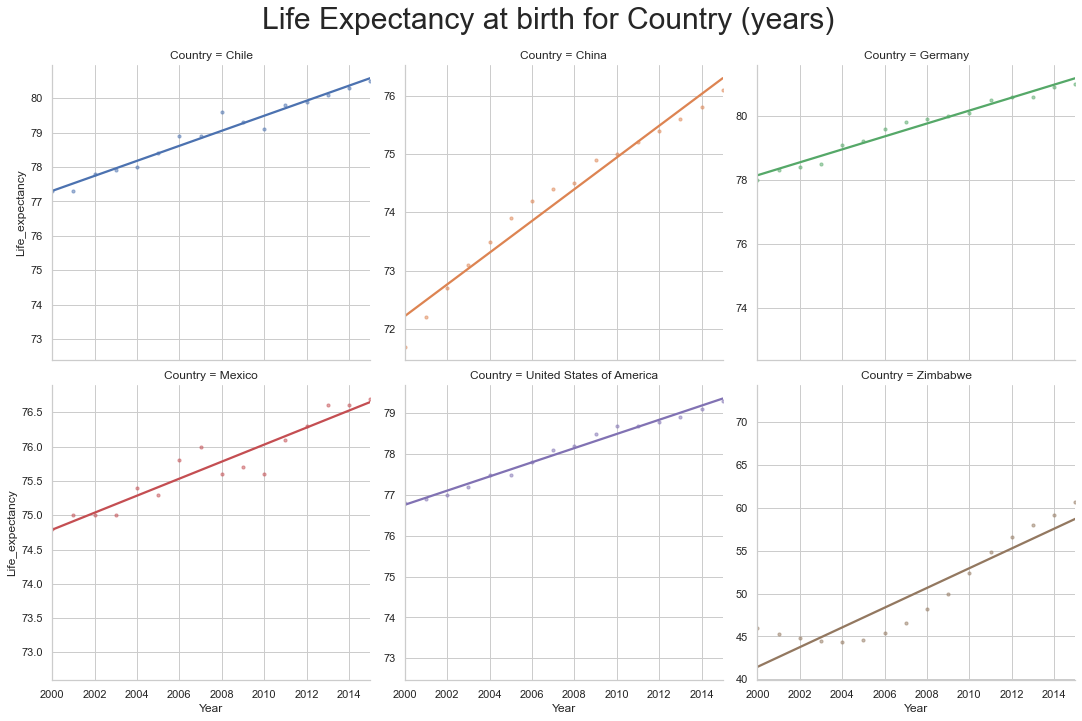

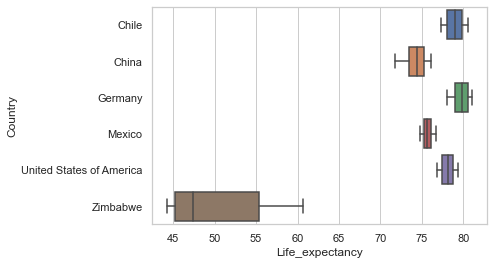

<Figure size 432x288 with 0 Axes>

In [6]:
# lm plot
sns.set_theme(style="whitegrid")
life_exp_plots = sns.lmplot(
    data=df, x="Year", y="Life_expectancy", col="Country" , hue="Country", 
    col_wrap=3, ci=None, scatter_kws={"s": 10, "alpha": .5}, sharey=False,
)
life_exp_plots.fig.subplots_adjust(top=.9)
life_exp_plots.fig.suptitle('Life Expectancy at birth for Country (years)', fontsize=30)
plt.show()
plt.clf()

# boxplot
life_exp_boxplot =sns.boxplot(data=df, y="Country", x="Life_expectancy")
plt.show()
plt.clf()

##### Has GDP increased over time in the six nations?

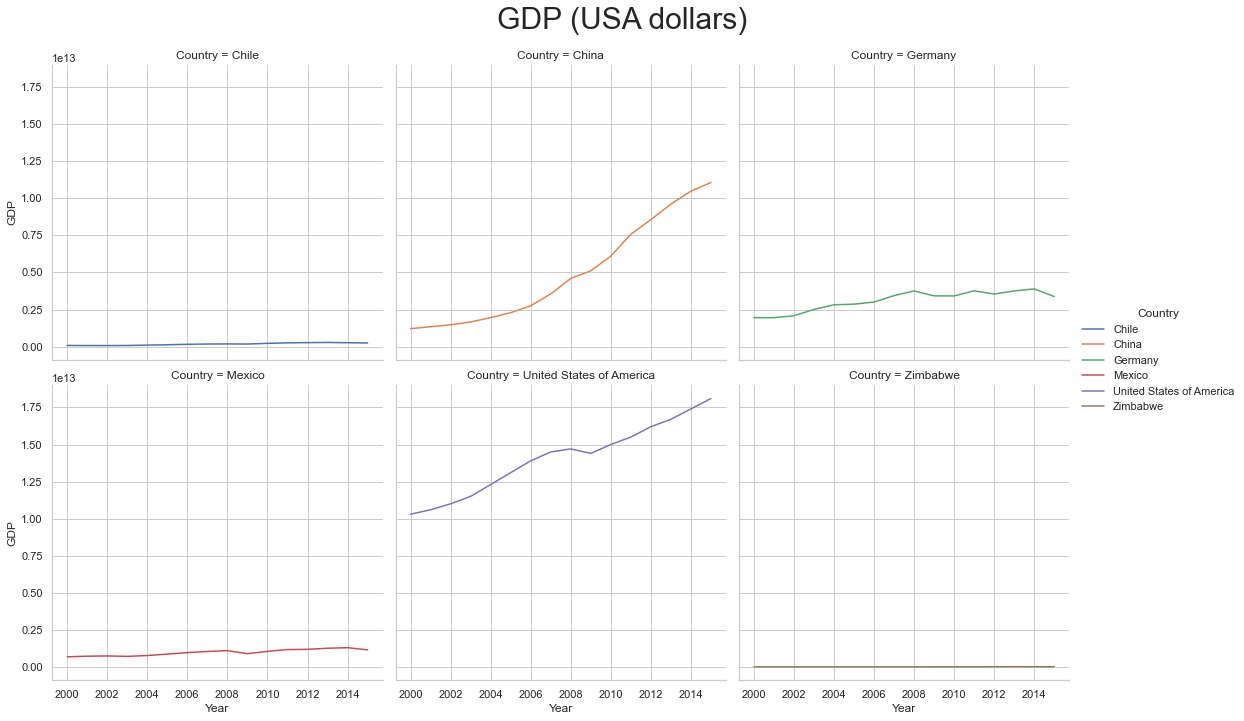

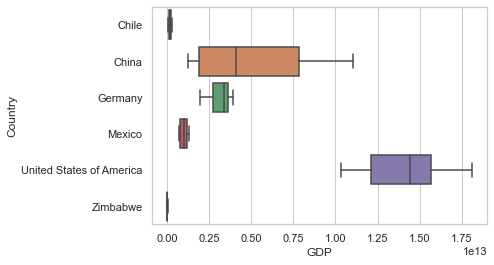

<Figure size 432x288 with 0 Axes>

In [7]:
# relplot, all countries GDP plot lines.
gdp_plots = sns.relplot(
    data=df, x="Year", y="GDP", col="Country" , hue="Country", 
    col_wrap=3, kind='line'
)
gdp_plots.fig.subplots_adjust(top=.9)
gdp_plots.fig.suptitle('GDP (USA dollars)', fontsize=30)
plt.show()
plt.clf()

# boxplot
gdp_boxplot =sns.boxplot(data=df, x="GDP", y="Country")
plt.show()
plt.clf()

##### Is there a correlation between GDP and life expectancy of a country?

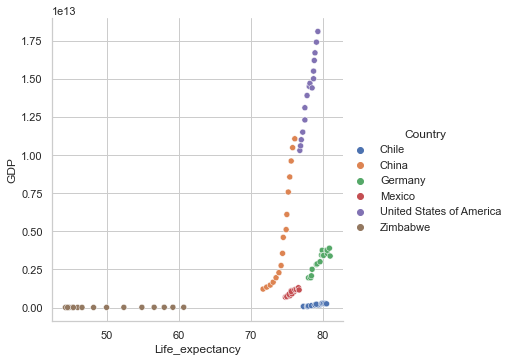

<Figure size 432x288 with 0 Axes>

In [8]:
gdp_le_relation = sns.relplot(data=df, x="Life_expectancy", y="GDP", hue="Country")
plt.show()
plt.clf()

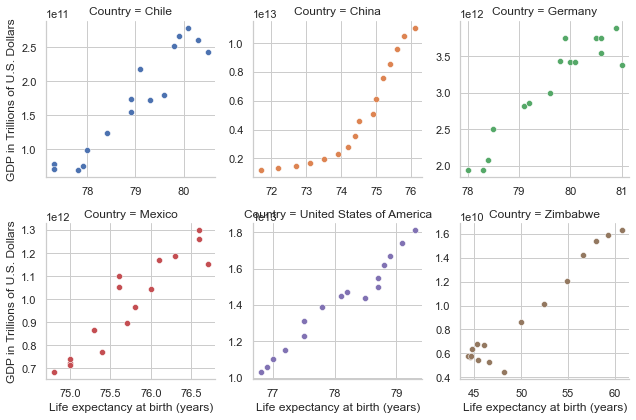

In [9]:
dist_countries = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
dist_countries = (dist_countries.map(sns.scatterplot,"Life_expectancy", "GDP")
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"))

##### What is the average life expectancy in these nations?

In [10]:
countries_life_expectancy_means = round(df.groupby('Country').mean(['Life_expectancy', 'GDP']).drop('Year', axis = 1).sort_values(by='Life_expectancy').reset_index())
countries_life_expectancy_means

,Country,Life_expectancy,GDP
0,Zimbabwe,50.0,9.062580e+09
1,China,74.0,4.957714e+12
2,Mexico,76.0,9.766506e+11
3,United States of America,78.0,1.407500e+13
4,Chile,79.0,1.697888e+11
5,Germany,80.0,3.094776e+12


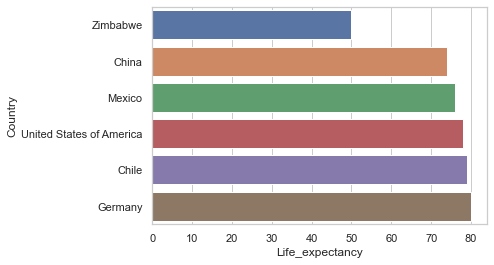

<Figure size 432x288 with 0 Axes>

In [11]:
sns.barplot(data = countries_life_expectancy_means, y = 'Country', x = 'Life_expectancy')
plt.show()
plt.clf()

##### What is the distribution of that life expectancy?

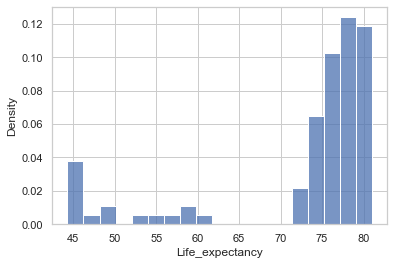

<Figure size 432x288 with 0 Axes>

In [15]:
# histogram
sns.histplot(data=df, x='Life_expectancy', stat='density')
plt.show()
plt.clf()